In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
!wget = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

--2023-05-25 16:23:05--  http://=/
Resolving = (=)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘=’
--2023-05-25 16:23:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35648 (35K) [text/csv]
Saving to: ‘automobileEDA.csv.1’

automobileEDA.csv.1 100%[===================>]  34.81K  --.-KB/s    in 0.01s   

2023-05-25 16:23:06 (3.10 MB/s) - ‘automobileEDA.csv.1’ saved [35648/35648]

FINISHED --2023-05-25 16:23:06--
Total wall clock time: 1.2s
Downloaded: 1 files, 35K in

In [11]:
df=pd.read_csv("automobileEDA.csv", header = 0)

In [12]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [13]:
x = df[["highway-mpg"]]
y = df['price']
lm.fit(x,y)

LinearRegression()

In [14]:
Yhat=lm.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
print(lm.intercept_)
print(lm.coef_)

38423.305858157415
[-821.73337832]


In [24]:
lm1= LinearRegression()
lm1

LinearRegression()

In [25]:
X =df[["engine-size"]]
Y =df["price"]
lm1.fit(X,Y)

LinearRegression()

In [28]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [29]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281046
[166.86001569]


In [31]:
Yhat = -7963.34 + 166.86*X
Price = -7963.34 + 166.86*df[["engine-size"]]

In [32]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [33]:
lm.fit(Z,df['price'])

LinearRegression()

In [34]:
print(lm.intercept_)
print(lm.coef_)

-15806.624626329245
[53.49574423  4.70770099 81.53026382 36.05748882]


In [35]:
Q =df[['normalized-losses','highway-mpg']]

In [36]:
lm2 = LinearRegression()

In [37]:
lm2.fit(Q,df['price'])

LinearRegression()

In [38]:
print(lm2.intercept_)
print(lm2.coef_)

38201.31327245733
[   1.49789586 -820.45434016]


In [39]:
#2.Model Evaluation Using Visualization

(0.0, 48167.40363438628)

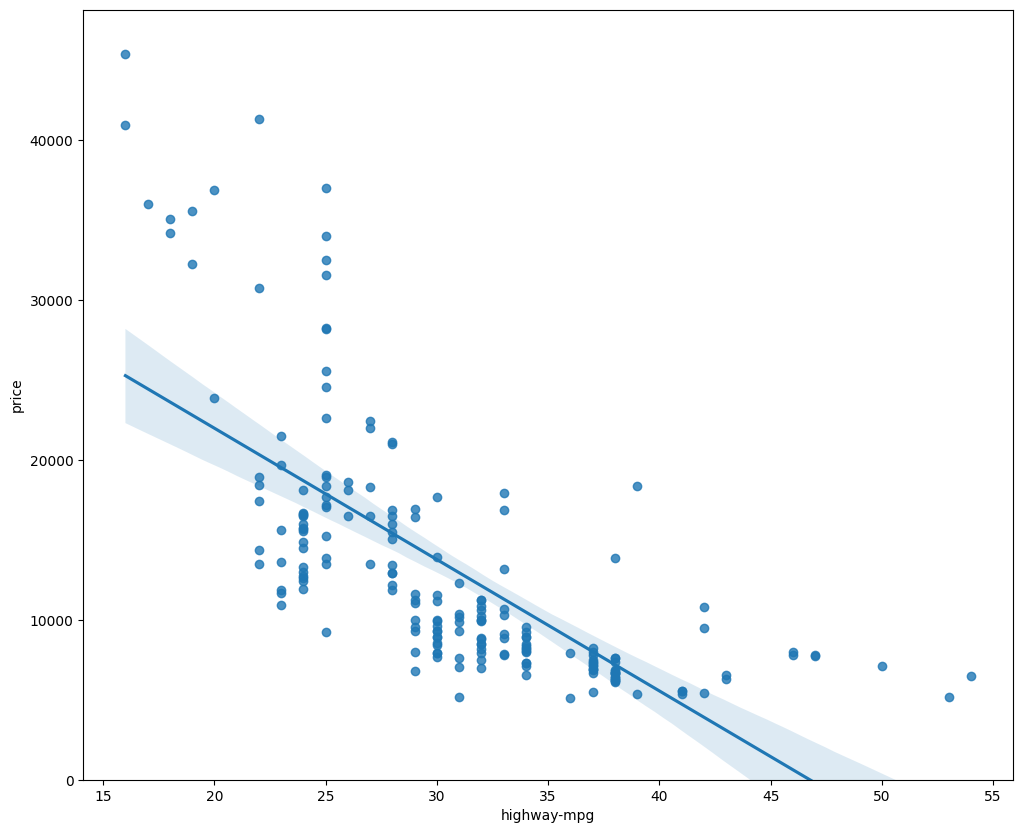

In [43]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0)

(0.0, 47414.1)

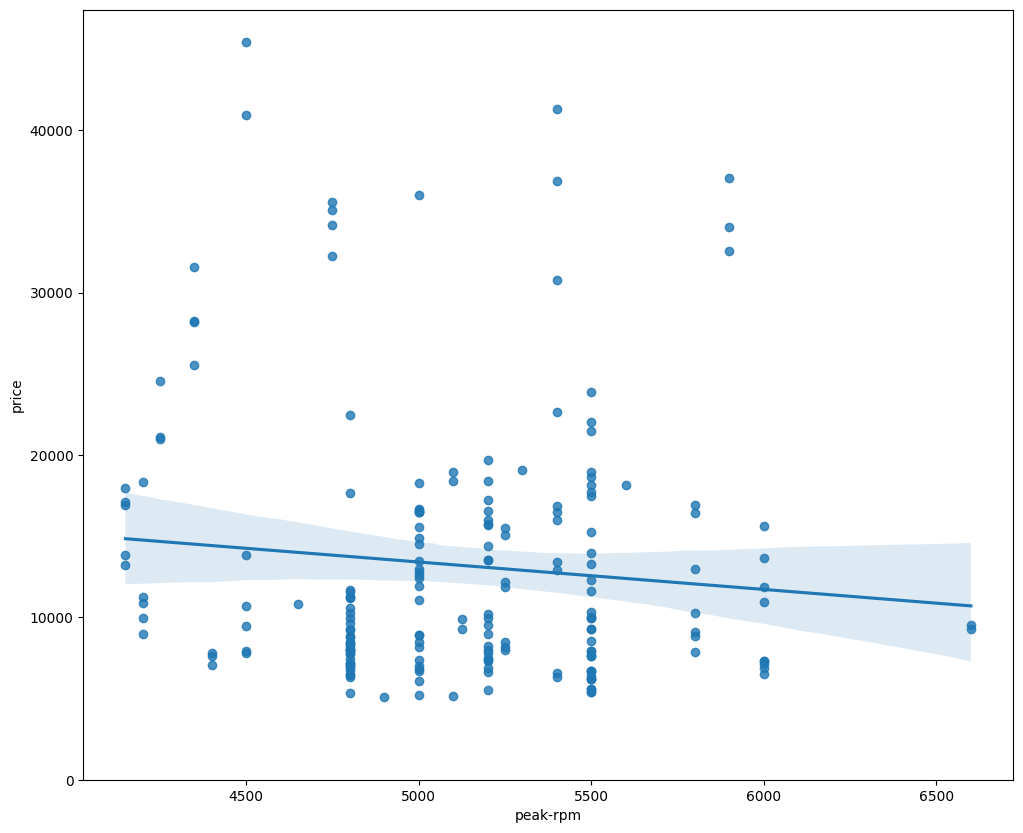

In [47]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [48]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


(0.0, 22450.668458176675)

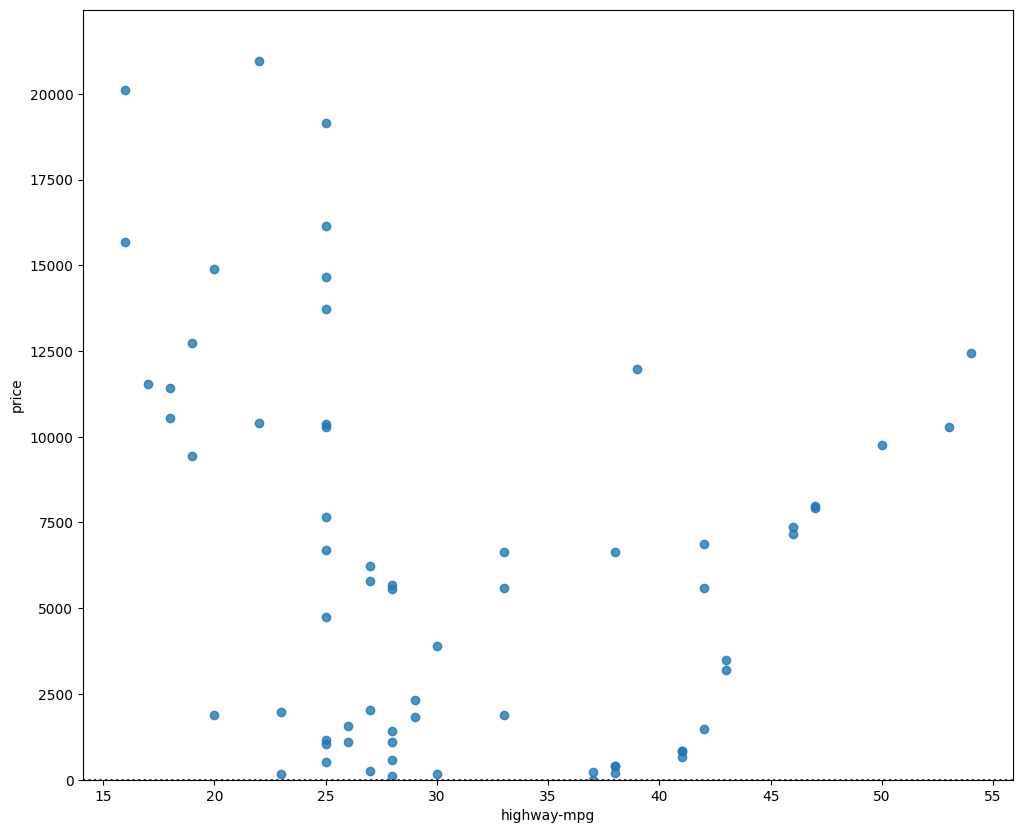

In [51]:
width = 12
height =10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.ylim(0,)

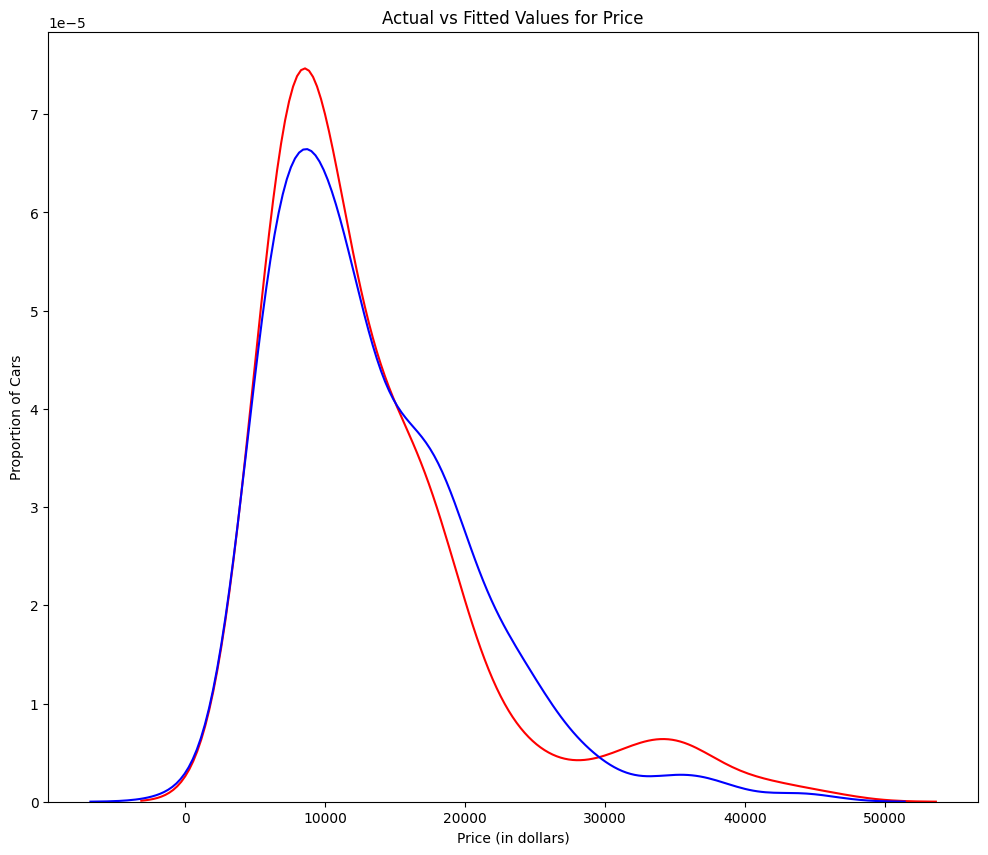

In [52]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [54]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.',x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    
    plt.show()
    plt.close()
    

In [55]:
x = df["highway-mpg"]
y = df['price']

In [57]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


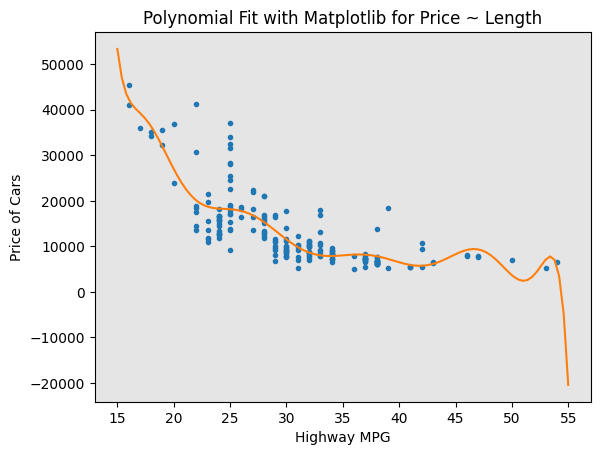

In [59]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')